<a href="https://colab.research.google.com/github/matthieubarral-ai/matthieurepo/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
# install mplfinance
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

ModuleNotFoundError: No module named 'mplfinance'

# Check files on disk
* Go to the classroom and download the financial_data file
* Extract the data in your folder, or updload it on Google Colab.
    * You can directly upload a 'zip' file on Google Drive.
    * Then, you'll have to mount google drive, find the correct folder and unzip the file
    * You can achieve this by  adapting the following code

In [5]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')
!ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


In [6]:
!ls drive/MyDrive/

'Assesment 1 - Corporate finance (1).xlsx'
'Assesment 1 - Corporate finance.gsheet'
'Assesment 1 - Corporate finance.xlsx'
 Classroom
'Colab Notebooks'
'Copie de Assesment 1 - Corporate finance.xlsx'
'Copie de MATTHIEU BARRAL - Search log.gsheet'
'Financial Data'
'MATTHIEU BARRAL - 9B16N059 (1) (1).gdoc'
'MATTHIEU BARRAL - 9B16N059 (1).gdoc'
'MATTHIEU BARRAL - Fuyao Glass Dividend-Students (1).gsheet'
'MATTHIEU BARRAL - Fuyao Glass Dividend-Students.gsheet'
'Problem Set 1.gdoc'
'Python for finance - lab 1.gslides'


In [7]:
!ls "drive/MyDrive/Financial Data/stocks"
#sert à afficher la liste des fichiers et dossiers contenus dans le répertoire "drive/MyDrive/Financial Data/stocks".

AAPL.csv  AMGN.csv   CSCO.csv  GOOGL.csv  MSFT.csv  PEP.csv   SBUX.csv
ADBE.csv  AMZN.csv   GILD.csv  INTC.csv   NFLX.csv  PYPL.csv  TSLA.csv
AMD.csv   CMCSA.csv  GOOG.csv  META.csv   NVDA.csv  QCOM.csv


In [8]:
import os

dirpath = '/content/drive/MyDrive/Financial Data/stocks'

for dirname, _, filenames in os.walk(dirpath):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Financial Data/stocks/AMGN.csv
/content/drive/MyDrive/Financial Data/stocks/PYPL.csv
/content/drive/MyDrive/Financial Data/stocks/CMCSA.csv
/content/drive/MyDrive/Financial Data/stocks/SBUX.csv
/content/drive/MyDrive/Financial Data/stocks/AMZN.csv
/content/drive/MyDrive/Financial Data/stocks/NFLX.csv
/content/drive/MyDrive/Financial Data/stocks/GILD.csv
/content/drive/MyDrive/Financial Data/stocks/INTC.csv
/content/drive/MyDrive/Financial Data/stocks/MSFT.csv
/content/drive/MyDrive/Financial Data/stocks/CSCO.csv
/content/drive/MyDrive/Financial Data/stocks/GOOGL.csv
/content/drive/MyDrive/Financial Data/stocks/META.csv
/content/drive/MyDrive/Financial Data/stocks/QCOM.csv
/content/drive/MyDrive/Financial Data/stocks/ADBE.csv
/content/drive/MyDrive/Financial Data/stocks/AAPL.csv
/content/drive/MyDrive/Financial Data/stocks/TSLA.csv
/content/drive/MyDrive/Financial Data/stocks/GOOG.csv
/content/drive/MyDrive/Financial Data/stocks/NVDA.csv
/content/drive/MyDrive/Fin

# Open a file as a pandas dataframe

Pandas is very well documented, check here for a complete User Guide :

https://pandas.pydata.org/docs/user_guide/index.html

* Choose one stock file and open it as a DataFrame using the method pd.read_csv(filepath)

In [11]:
# Ouvre un des fichiers CSV comme DataFrame
df = pd.read_csv("drive/MyDrive/Financial Data/stocks/AAPL.csv")

# Affiche les premières lignes pour vérifier
df.head()


,Date,Open,High,Low,Close,Volume,Symbol,YTD Gains
0,2002-12-31,0.250000,0.256429,0.249107,0.255893,200726400,AAPL,0.000000
1,2003-01-02,0.256429,0.266429,0.256250,0.264286,181428800,AAPL,0.032799
2,2003-01-03,0.264286,0.266607,0.260536,0.266071,147453600,AAPL,0.039774
3,2003-01-06,0.268393,0.274643,0.265714,0.266071,390532800,AAPL,0.039774
4,2003-01-07,0.264107,0.267857,0.258393,0.265179,342344800,AAPL,0.036289


# Set up the Dataframe

* convert values in the 'Date' column using pd.to_datetime(dfcolumn)
* set the date as index using df.set_index(column, inplace = True)
* check the first few lines of the dataframe using head()
* what happens if you type 'print(df[(df.index.day==1) & (df.index.month==9)]). Why ?

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)




In [17]:
df.head()

,Open,High,Low,Close,Volume,Symbol,YTD Gains
Date,,,,,,,
2002-12-31,0.250000,0.256429,0.249107,0.255893,200726400,AAPL,0.000000
2003-01-02,0.256429,0.266429,0.256250,0.264286,181428800,AAPL,0.032799
2003-01-03,0.264286,0.266607,0.260536,0.266071,147453600,AAPL,0.039774
2003-01-06,0.268393,0.274643,0.265714,0.266071,390532800,AAPL,0.039774
2003-01-07,0.264107,0.267857,0.258393,0.265179,342344800,AAPL,0.036289


In [13]:
df[(df.index.day == 1) & (df.index.month == 9)]


,Open,High,Low,Close,Volume,Symbol,YTD Gains
Date,,,,,,,
2004-09-01,0.612500,0.642679,0.610536,0.640357,515726400,AAPL,1.502441
2005-09-01,1.678571,1.684643,1.646071,1.652143,356367200,AAPL,5.456382
2006-09-01,2.445714,2.451786,2.422143,2.442143,408494800,AAPL,8.543610
2009-09-01,5.999643,6.071429,5.890714,5.903571,469028000,AAPL,22.070468
2010-09-01,8.838214,8.980714,8.795714,8.940357,697037600,AAPL,33.937874
2011-09-01,13.779286,13.833571,13.597143,13.608214,343725200,AAPL,52.179316
2015-09-01,27.537500,27.969999,26.840000,26.930000,307383600,AAPL,104.239304
2016-09-01,26.535000,26.700001,26.405001,26.682501,106806000,AAPL,103.272105
2017-09-01,41.200001,41.235001,40.907501,41.012501,66364400,AAPL,159.272075


# Plot the closing price
You will start using PyPlot here, the most wellknown plotting library for Python.

Have a look here for a few examples :

https://matplotlib.org/stable/tutorials/pyplot.html

* Use df.plot(y = ..., use_index = True) to visualize the closing price
* Use 'plt' and 'sns' functions to improve your figure
    * Define a size for the figure with plt.figure(figsize = (w,h)), unit is inches (typically (12,8))
    * Use df.plot(y = ..., use_index = True) to visualize the closing price
    * set a title with plt.title
    * set labels with plt.xlabel and plt.ylabel
    * set a sns style with sns.set_style(...), options are 'white', 'whitegrid', 'dark', 'darkgrid'
    * show the plot with plt.show()

<Figure size 1200x800 with 0 Axes>

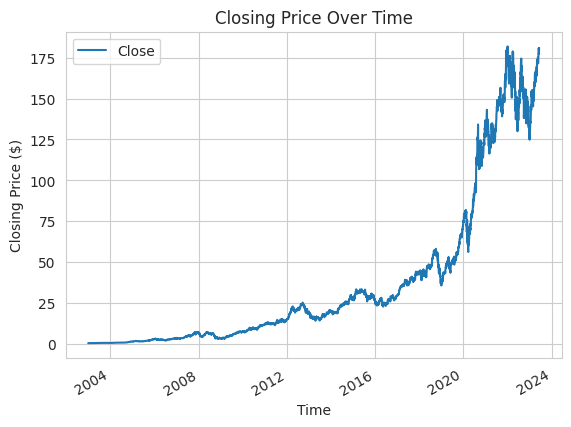

In [14]:
#création d'un graphique
sns.set_style('whitegrid')
#crée le graphique / la figure
plt.figure(figsize=(12,8))
#crée la courbe
df.plot(y='Close', use_index=True)

#noms des axes, titres du graphiques
plt.title('Closing Price Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price ($)')

#Montre le graphique:
plt.show()


<Figure size 800x1200 with 0 Axes>

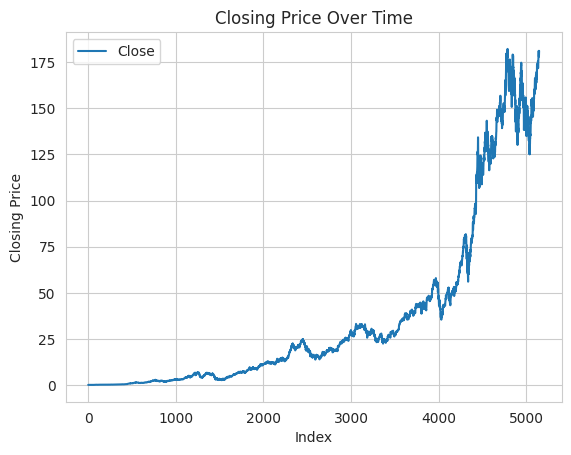

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,12))
df.plot(y='Close', use_index=False)

plt.title('Closing Price Over Time')
plt.xlabel('Index')
plt.ylabel('Closing Price')

plt.show()


# Daily returns
* Let's add a column to our dataset with daily returns
    * For that, you can apply the function pct_change() to the 'Close' column
    * Check the result using df.head()

In [16]:
df['Daily Return']=df['Close'].pct_change()
df.head()

,Open,High,Low,Close,Volume,Symbol,YTD Gains,Daily Return
Date,,,,,,,,
2002-12-31,0.250000,0.256429,0.249107,0.255893,200726400,AAPL,0.000000,NaN
2003-01-02,0.256429,0.266429,0.256250,0.264286,181428800,AAPL,0.032799,0.032799
2003-01-03,0.264286,0.266607,0.260536,0.266071,147453600,AAPL,0.039774,0.006754
2003-01-06,0.268393,0.274643,0.265714,0.266071,390532800,AAPL,0.039774,0.000000
2003-01-07,0.264107,0.267857,0.258393,0.265179,342344800,AAPL,0.036289,-0.003352


# Plotting daily returns

You will use Seaborn for that plot. Seaborn is a high-level and quite intuitive library.

Check the following link for several plot examples :

https://seaborn.pydata.org/tutorial/introduction.html

* Plot the histogram of daily returns in order to check the distribution
    * This can be done using sns.histplot(..., bins=..., kde=[True/False]). You can vary the bins number and try with or without kde.
    * Don't forget that the first value is a NaN (not a number), you can discard it using df['Your_column'].dropna()
    * You can remove axis if it looks more beautiful to you using sns.despine(left = True). This will remove the top, right (default) and left axis.

<function matplotlib.pyplot.show(close=None, block=None)>

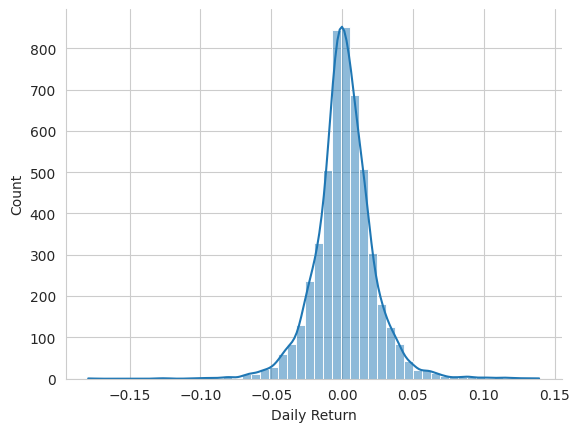

In [17]:
daily_returns=df['Daily Return'].dropna()

sns.histplot(daily_returns, bins=50, kde=True)
sns.despine(left=True)
sns.despine(right=True)
plt.show

# Candlestick charts
Matplotlib also contains a library specialized for Finance, called mplfinance

Have a look here for a list of tutorials :

https://github.com/matplotlib/mplfinance#tutorials

* A bit of preprocessing is needed on the dataframe
    * First, filter the dataframe to only keep data from 2022 or after. In other words, you want all the rows for which df.index.year>2021. Store that in a new dataframe.
    * Then, compute a monthly mean by applying the functions resample(...) and mean() to your new dataframe. Again, store that in a new dataframe.
* Visualize the candlestick plot with mplfinance
    * Import the correct library (mplfinance, usually loaded as mpf)
    * Plot using mpf.plot(..., type = 'candle', style = '...', volume = [True|False])
    * Try different styles, different options and see the impact on the figure

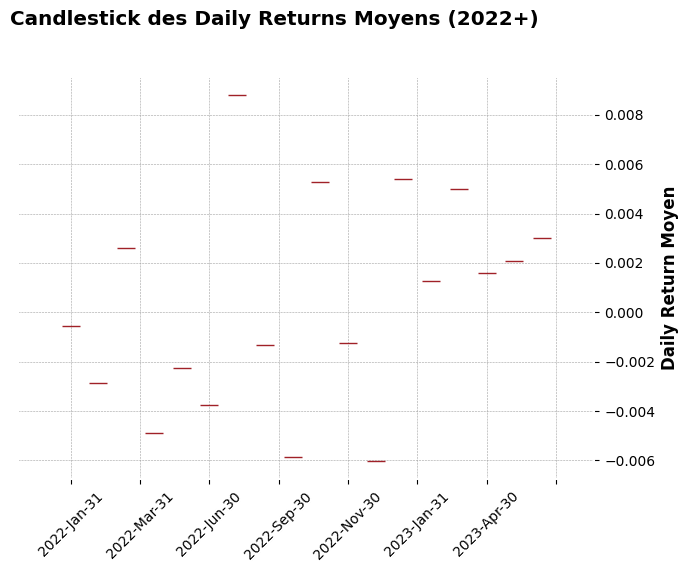

In [30]:
# Moyenne mensuelle du Daily Return
monthly_avg = df_2022['Daily Return'].resample('ME').mean()

# Crée un DataFrame avec O/H/L/C identique pour mplfinance
df_mpf = pd.DataFrame({
    'Open': monthly_avg,
    'High': monthly_avg,
    'Low': monthly_avg,
    'Close': monthly_avg
})

# Optionnel : ajouter un Volume fictif (mplfinance peut l'exiger)
df_mpf['Volume'] = 0

import mplfinance as mpf

mpf.plot(
    df_mpf,
    type='candle',    # candlestick
    style='charles',
    volume=False,     # True si tu as un volume réel
    title='Candlestick des Daily Returns Moyens (2022+)',
    ylabel='Daily Return Moyen'
)


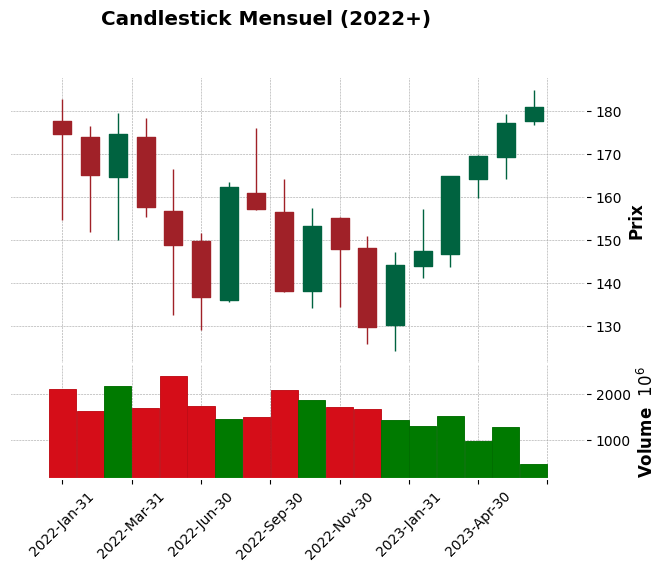

In [31]:
df_2022 = df[df.index.year >= 2022]
df_monthly = df_2022.resample('ME').agg({
    'Open': 'first',   # premier prix du mois
    'High': 'max',     # plus haut du mois
    'Low': 'min',      # plus bas du mois
    'Close': 'last',   # dernier prix du mois
    'Volume': 'sum'    # volume total du mois
})

mpf.plot(
    df_monthly,
    type='candle',
    style='charles',
    volume=True,
    title='Candlestick Mensuel (2022+)',
    ylabel='Prix'
)
